# **I. Introduction**


Nama : Monica M. Pratiwi
<br>
Batch : FTDS-016-RMT

## **Dataset yang Digunakan**

Dataset yang digunakan adalah dataset 'WA_Fn-UseC_-Telco-Customer-Churn'

## **Objective**

Menerapkan pembelajaran Artificial Neural Network dalam memprediksi perilaku customer dalam hal kecenderungan untuk berhenti menggunakan layanan Telco.

# **II. Import Libraries**

In [6]:
# Connect Drive to Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [76]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn import metrics
from sklearn.metrics import classification_report 

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import Input, concatenate
from tensorflow.keras import Model

import joblib
import json
import warnings
warnings.filterwarnings("ignore")

# **III. Data Loading**

In [10]:
# Loading Dataset
data = pd.read_csv('/content/drive/MyDrive/bq-results-20221121-072603-1669016735963/WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
#Show the last 5 rows of the data
data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [12]:
# Make a copy
data2 = data.copy()

In [13]:
# Data Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Jika dilihat baik dari head maupun tail, pada data ini, kolom `TotalCharges` merupakan data numerical. Namun berdasarkan informasi di atas, kolom `TotalCharges` merupakan data object. Selain itu, tidak ditemukan missing values pada data. Ketika akan dilakukan konversi dari object ke numerical (integer/float), muncul error sebagai berikut

`ValueError: Unable to parse string " "`

Sumber:
JAGANNATHBANERJEE. (2018). *Telco Customer Churn EDA and Classification*. [Online forum post]. Kaggle: [tautan berikut](https://www.kaggle.com/code/jbanerje/telco-customer-churn-eda-and-classification/notebook).

In [14]:
#Identifying the rows containing missing data
missing_value_row = list(data[data['TotalCharges'] == " "].index)
print('Missing Value Rows : ', missing_value_row , '\nTotal rows : ', len(missing_value_row))

Missing Value Rows :  [488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754] 
Total rows :  11


In [15]:
# Replacing the spaces with 0
for missing_row in missing_value_row :
    data['TotalCharges'][missing_row] = 0

In [16]:
# Change to Numerical
data['TotalCharges']=pd.to_numeric(data['TotalCharges'])

Setelah dilakukan perubahan jenis data untuk `TotalCharges`, akan dilakukan hal yang sama untuk `Churn`.

In [17]:
# Change categorical value to binary
data['Churn'].replace(['No', 'Yes'],
                        [0, 1], inplace=True)

In [18]:
# Data Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [19]:
# Data Summary
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304,0.265370
std,0.368612,24.559481,30.090047,2266.794470,0.441561
min,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,398.550000,0.000000
50%,0.000000,29.000000,70.350000,1394.550000,0.000000
75%,0.000000,55.000000,89.850000,3786.600000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


# **IV. Exploratory Data Analysis (EDA)**

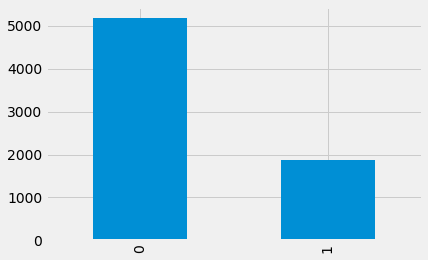

In [20]:
# Value counts of `Churn`
data['Churn'].value_counts().plot(kind="bar")

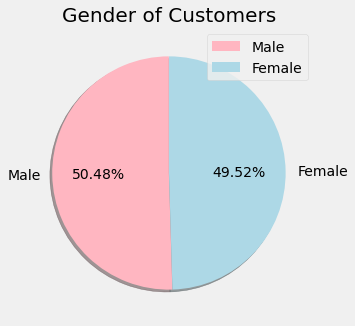

In [21]:
# Compare the Gender of Customers
labels = ['Male', 'Female']
size = data['gender'].value_counts()
colors = ['lightpink', 'lightblue']
explode = [0, 0.001]

plt.rcParams['figure.figsize'] = (5, 5)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, startangle = 90, autopct = '%.2f%%')
plt.title('Gender of Customers', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

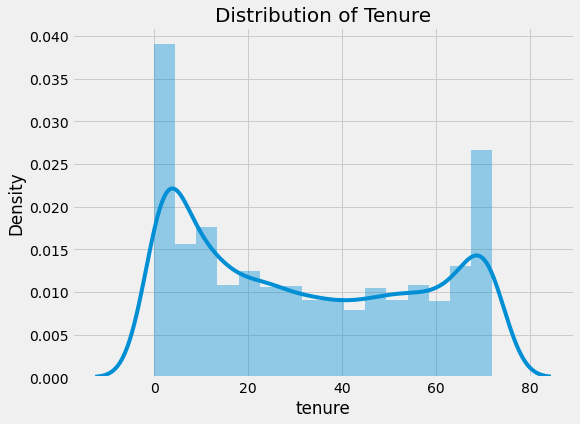

In [22]:
# Distribution of Tenure
plt.figure(figsize=(8,6))
sns.distplot(data['tenure'])
plt.title('Distribution of Tenure', fontsize = 20)
plt.show()

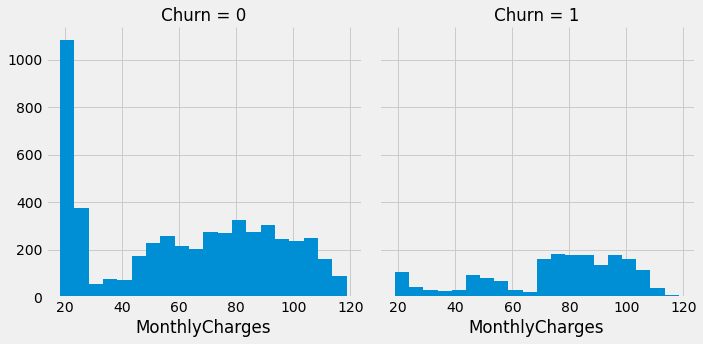

In [24]:
# Distribution of Monthly Charges and Churn
sns.FacetGrid(data, height=5, aspect=1, col='Churn').map(plt.hist, 'MonthlyCharges', bins=20)
plt.show()

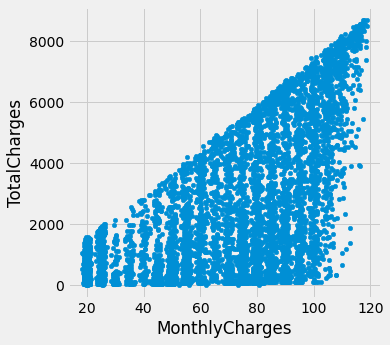

In [25]:
# Scatter Plot
data.plot.scatter(x = 'MonthlyCharges', y = 'TotalCharges')

# **V. Data Preprocessing**

## **Get data for Model Inference**

In [26]:
# Get Data for Model Inference
data_inference = data.sample(15, random_state=278)

In [27]:
# Remove inference set from dataset
data_train_test = data.drop(data_inference.index)

In [28]:
# Reset Index
data_train_test.reset_index(drop=True, inplace=True)
data_inference.reset_index(drop=True, inplace=True)

## **Splitting X and y**

In [29]:
# Drop `customerID`
data_train_test.drop('customerID', axis=1, inplace=True)
data_train_test.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [30]:
# Splitting between `X ` AND `y`
X = data_train_test.drop(['Churn'], axis=1) 
y = data_train_test['Churn']
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [31]:
# Split between Train Set, Validation Set, and Test Set
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, train_size=0.9, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, train_size=0.8, stratify=y_train_val)

## **Split between Numerical columns and Categorical Columns**

In [32]:
# Get Numerical Columns and Categorical Columns

numerical = X_train.select_dtypes(include=np.number).columns.tolist()
categorical = X_train.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns : ', numerical)
print('Categorical Columns : ', categorical)

Numerical Columns :  ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
Categorical Columns :  ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


## **Handling Outlier**

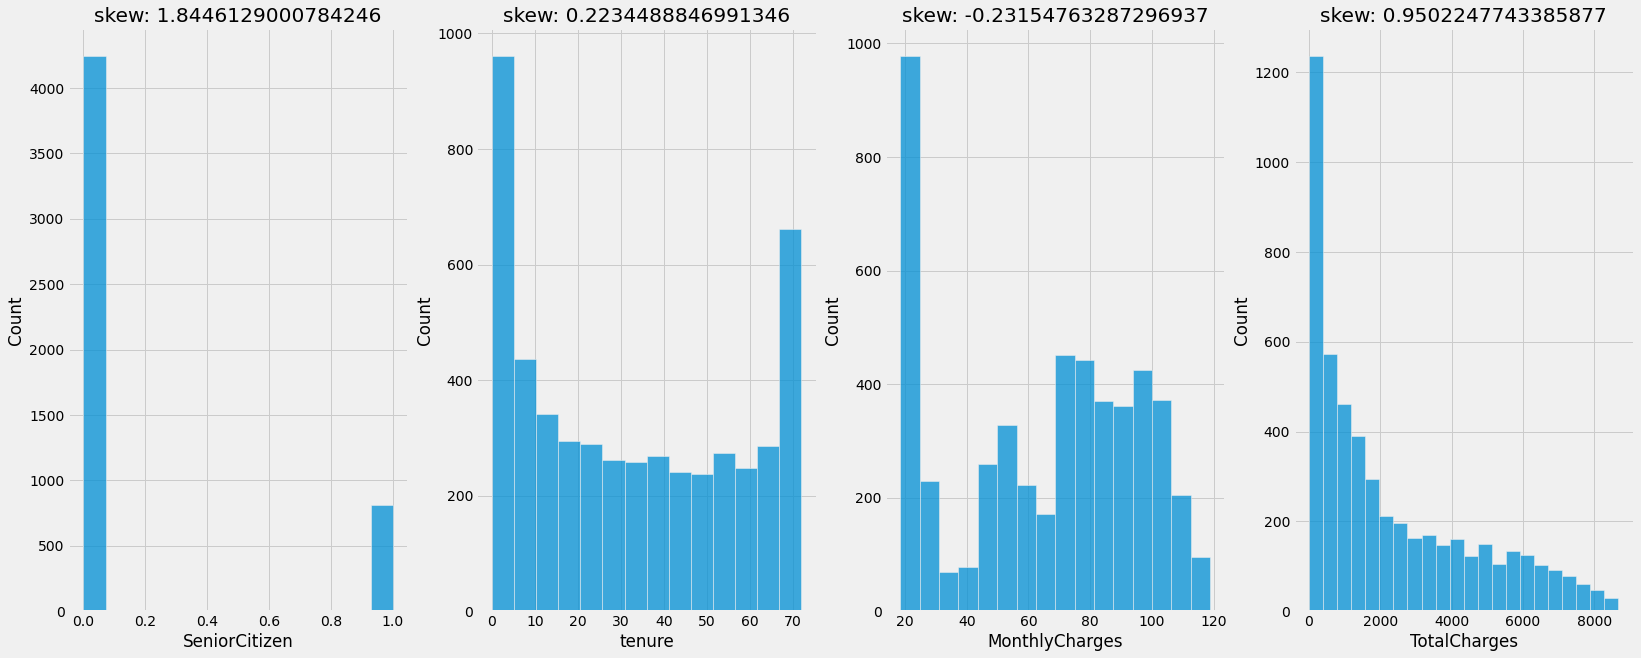

In [33]:
# Plot the numerical columns in `X_train`
fig, ax = plt.subplots(ncols=4, figsize=[25,10])
ax = ax.flatten()

for idx, col in enumerate(numerical):
    sns.histplot(X_train[col], ax=ax[idx])
    ax[idx].set_title(f'skew: {X_train[col].skew()}')

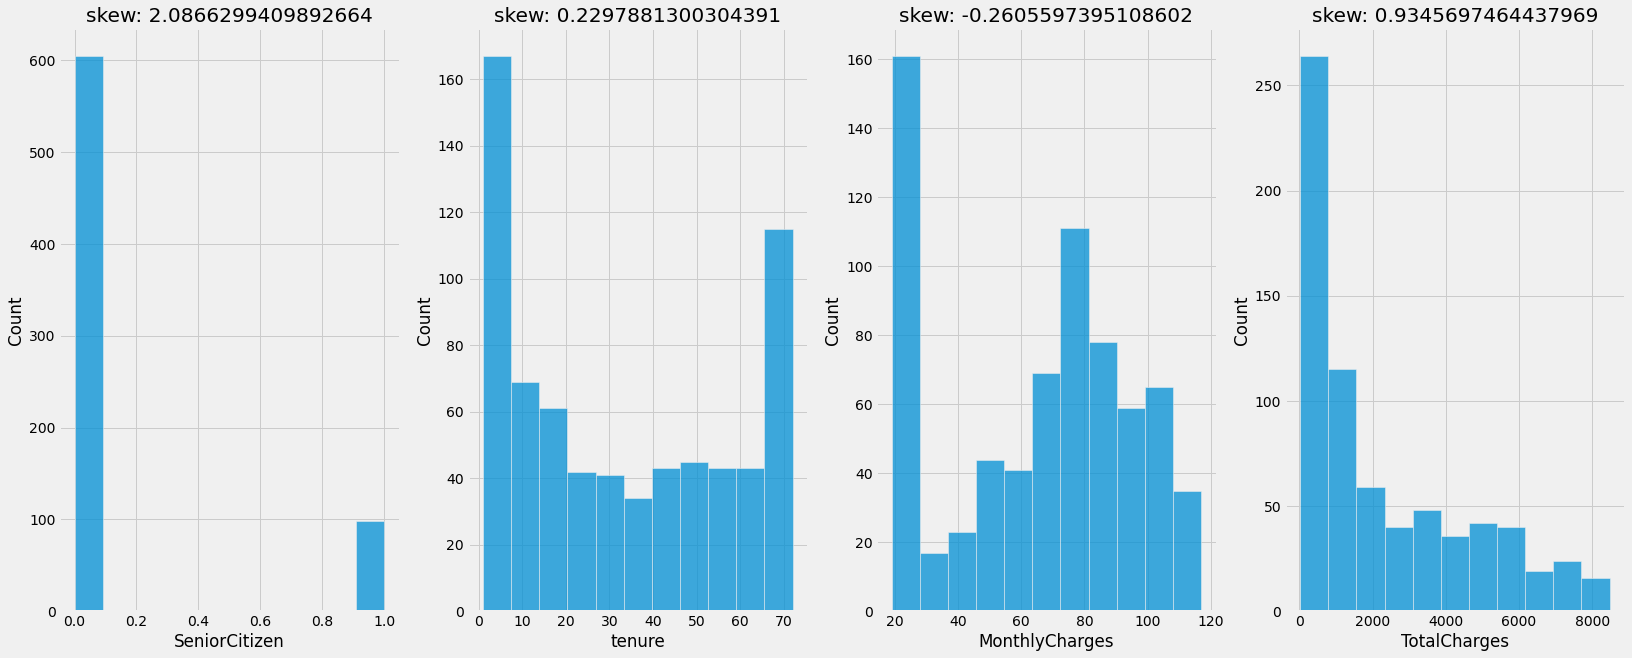

In [34]:
# Plot the numerical columns in `X_test`
fig, ax = plt.subplots(ncols=4, figsize=[25,10])
ax = ax.flatten()

for idx, col in enumerate(numerical):
    sns.histplot(X_test[col], ax=ax[idx])
    ax[idx].set_title(f'skew: {X_test[col].skew()}')

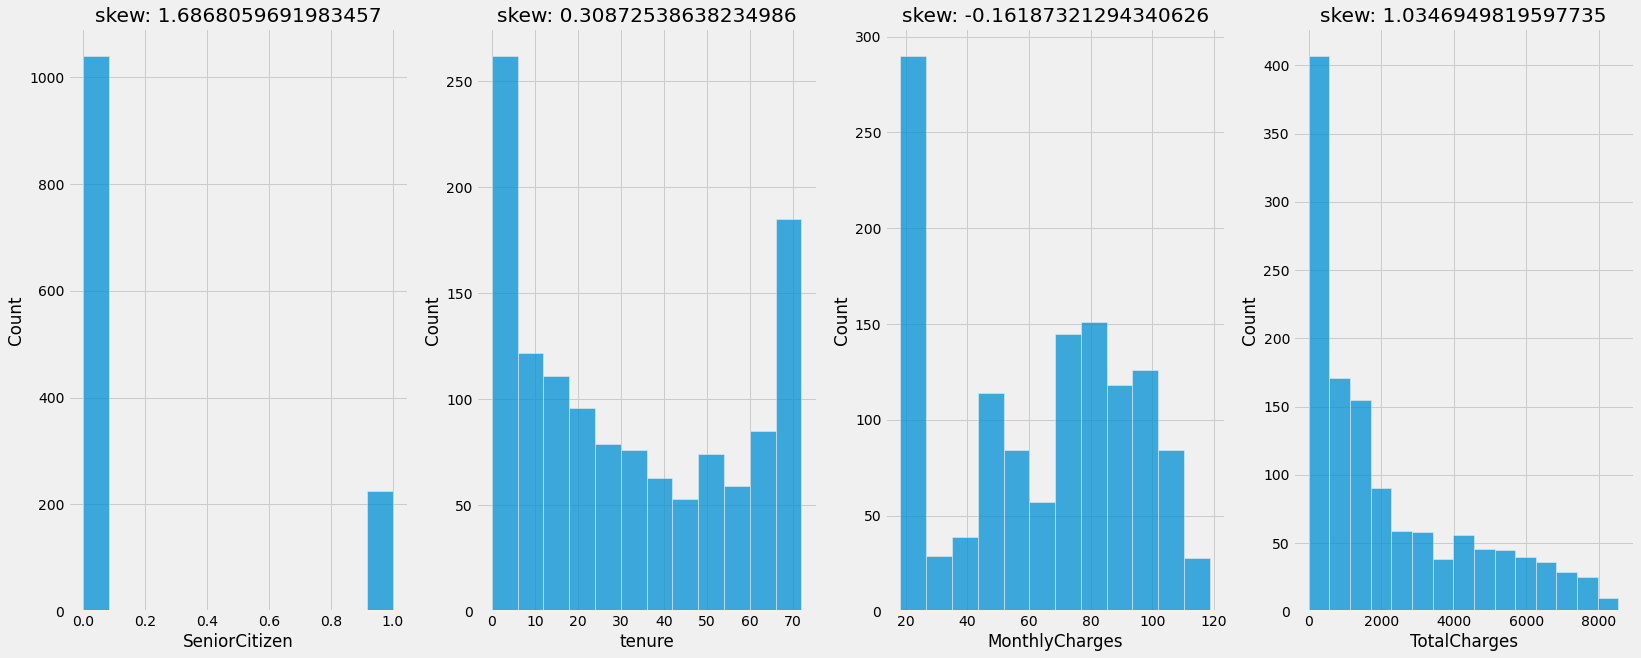

In [35]:
# Plot the numerical columns in `X_val`
fig, ax = plt.subplots(ncols=4, figsize=[25,10])
ax = ax.flatten()

for idx, col in enumerate(numerical):
  sns.histplot(X_val[col], ax=ax[idx])
  ax[idx].set_title(f'skew: {X_val[col].skew()}')

Kolom `TotalCharges` memiliki nilai kecondongan yang cukup tinggi, mengindikasikan adanya outlier dan data tidak terdistribusi dengan normal. Kolom `SeniorCitizen` memiliki nilai skewness yang tinggi. outlier handling dirasa tidak perlu dilakukan pada kedua kolom karena pada kolom `SeniorCitizen` terdiri atas 2 pilihan sementara pada kolom `TotalCharges` merupakan data finansial yang sebaiknya tidak diubah.

## **Missing Values**

In [36]:
# Check Missing Values in `X_train`
X_train.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [37]:
# Check Missing Values in `X_train`
X_test.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [38]:
# Check Missing Values in `X_train`
X_val.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [39]:
# Check Missing Values in `y_train`
y_train.isna().sum()

0

In [40]:
# Check Missing Values in `y_test`
y_test.isna().sum()

0

In [41]:
# Check Missing Values in `y_val`
y_val.isna().sum()

0

Berdasarkan pemeriksaan, tidak ditemukan missing value pada data.

## **Feature Scaling**

In [42]:
# Get Numerical Columns and Categorical Columns

numerical = X_train.select_dtypes(include=np.number).columns.tolist()
categorical = X_train.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns : ', numerical)
print('Categorical Columns : ', categorical)

Numerical Columns :  ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
Categorical Columns :  ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [43]:
# Split Train-Set and Test-Set based on Column Types

X_train_num = X_train[numerical]
X_val_num = X_val[numerical]
X_test_num = X_test[numerical]

X_train_cat = X_train[categorical]
X_val_cat = X_val[categorical]
X_test_cat = X_test[categorical]

## **Pipeline**

Proses scaling dan encoding dilakukan menggunakan pipeline. Untuk data numerical, dipilih StandarScaler karena sebagian besar data numerical terdistribusi normal. Untuk data categorical, dipilih OneHotEncoder().

In [45]:
# Make Pipeline for Numerical Value
num_pipeline = Pipeline([
        ('scaler', StandardScaler())
    ])

X_train_num_tr = num_pipeline.fit_transform(X_train_num)

In [46]:
# Make Pipeline for Categorical Value
cat_pipeline = Pipeline([
        ('ohe_enc', OneHotEncoder(handle_unknown='ignore', sparse=False)) 
    ])

X_train_cat_tr = cat_pipeline.fit_transform(X_train_cat)

In [60]:
# Combine Pipeline
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, numerical),
        ("cat", cat_pipeline, categorical)
    ])

X_train = full_pipeline.fit_transform(X_train)

In [61]:
# Transform pipeline to `X_test`
X_val = full_pipeline.transform(X_val)
X_test = full_pipeline.transform(X_test)

# **VI. Sequential API**

## **Without Improvement**

In [63]:
# Create Model

model_seq = Sequential()
model_seq.add(Dense(100, input_dim=2, activation='relu', input_shape=(45,))) # Hidden Layer 1
model_seq.add(Dense(20, activation='relu')) # Hidden Layer 2
model_seq.add(Dense(1, activation='sigmoid')) # Output Layer

# Compile
model_seq.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

model_seq.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               4600      
                                                                 
 dense_4 (Dense)             (None, 20)                2020      
                                                                 
 dense_5 (Dense)             (None, 1)                 21        
                                                                 
Total params: 6,641
Trainable params: 6,641
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Plot Layers

tf.keras.utils.plot_model(model_seq, show_shapes=True)

In [ ]:
# Train the Model

history_seq = model_seq.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), batch_size=10)

In [88]:
# Create DataFrame
history_seq_df = pd.DataFrame(history_seq.history)
history_seq_df

,loss,accuracy,val_loss,val_accuracy
0,0.449763,0.784387,0.433530,0.788933
1,0.419532,0.803557,0.440057,0.773123
2,0.415789,0.800593,0.453392,0.764427
3,0.411873,0.811660,0.440974,0.780237
4,0.407006,0.809486,0.434187,0.788933
5,0.401884,0.810277,0.436621,0.789723
6,0.400420,0.809289,0.439906,0.783399
7,0.396255,0.813241,0.439617,0.784980
8,0.393900,0.815810,0.440692,0.778656
9,0.389275,0.815613,0.457190,0.785771


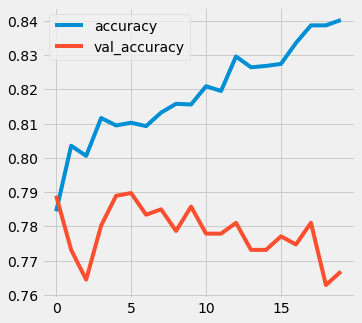

In [98]:
# Plot between accuracy and val_accuracy
history_seq_df[['accuracy', 'val_accuracy']].plot()

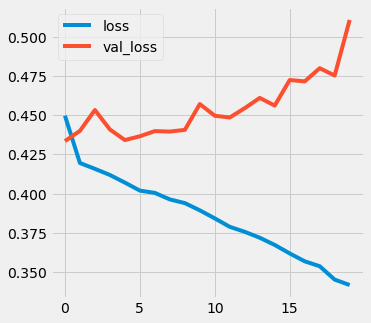

In [89]:
# Plot between loss and val_loss
history_seq_df[['loss', 'val_loss']].plot()

In [68]:
# Model Evaluation

y_pred_seq = model_seq.predict(X_test)
y_pred_seq = np.where(y_pred_seq >=0.5, 1, 0)

print(classification_report(y_test, y_pred_seq))

22/22 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.81      0.96      0.88       517
           1       0.77      0.38      0.51       186

    accuracy                           0.81       703
   macro avg       0.79      0.67      0.69       703
weighted avg       0.80      0.81      0.78       703



Pada model ini diperoleh nilai recall untuk pelanggan yang tidak berhenti menggunakan layanan (diwakili nilai 0) sebesar 0.96 dan yang berhenti menggunakan layanan (diwakili nilai 1) sebesar 0.38. Nilai accuracy secara keseluruhan menghasilkan nilai 81. Hasil plotting antara nilai `accuracy` dan `val_accuracy` yang saling menjauh dan berbanding terbalik. Begitupun pada Hasil plotting antara nilai `loss` dan `val_loss` yang memiliki titik temu namun 'terbuka' jaraknya semakin lebar.

## **With Improvement**

In [69]:
# Pipeline
train_pipe_seq = tf.data.Dataset.from_tensor_slices((X_train,y_train)).batch(10).repeat(5).shuffle(100).prefetch(tf.data.AUTOTUNE)
test_pipe_seq = tf.data.Dataset.from_tensor_slices((X_test,y_test)).batch(10)
val_pipe_seq = tf.data.Dataset.from_tensor_slices((X_val,y_val)).batch(10)

In [72]:
# Create Model
model_seq_improved = Sequential()
model_seq_improved.add(tf.keras.layers.Dense(100, activation='relu',input_shape=(45,))) #input layer
model_seq_improved.add(tf.keras.layers.BatchNormalization())
model_seq_improved.add(tf.keras.layers.Dense(20, activation='relu')) #hidden layer
model_seq_improved.add(tf.keras.layers.BatchNormalization())
model_seq_improved.add(tf.keras.layers.Dropout(0.1))
model_seq_improved.add(tf.keras.layers.Dense(1, activation='sigmoid')) #output layer

model_seq_improved.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(),metrics='accuracy')

model_seq_improved.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 100)               4600      
                                                                 
 batch_normalization (BatchN  (None, 100)              400       
 ormalization)                                                   
                                                                 
 dense_7 (Dense)             (None, 20)                2020      
                                                                 
 batch_normalization_1 (Batc  (None, 20)               80        
 hNormalization)                                                 
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                

In [ ]:
# Plot Layers
tf.keras.utils.plot_model(model_seq_improved, show_shapes=True)

In [ ]:
# Train Model
history_improved = model_seq.fit(train_pipe_seq, epochs=20,validation_data=val_pipe_seq)

In [82]:
# Create DataFrame
history_seq_improved_df = pd.DataFrame(history_improved.history)
history_seq_improved_df

,loss,accuracy,val_loss,val_accuracy
0,0.102548,0.960672,1.148085,0.743083
1,0.104926,0.959684,1.235896,0.750988
2,0.098375,0.961726,1.191820,0.735968
3,0.095277,0.963043,1.202669,0.728854
4,0.104627,0.959157,1.244383,0.758893
5,0.107366,0.958827,1.223490,0.750988
6,0.100757,0.960343,1.238459,0.750198
7,0.092117,0.962846,1.286689,0.746245
8,0.097470,0.962582,1.209751,0.747036
9,0.093272,0.964954,1.248791,0.753360


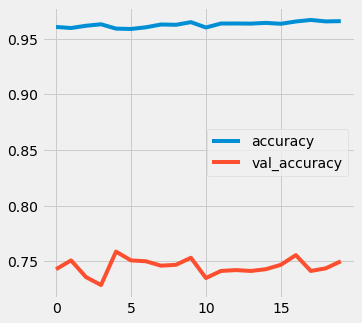

In [83]:
# Plot between accuracy and val_accuracy
history_seq_improved_df[['accuracy', 'val_accuracy']].plot()

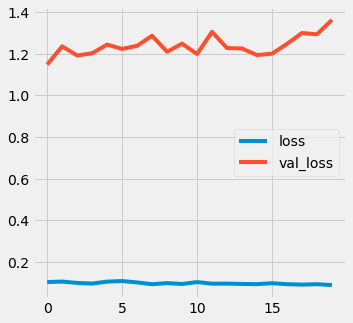

In [87]:
# Plot between loss and val_loss
history_seq_improved_df[['loss', 'val_loss']].plot()

In [75]:
# Model Evaluation

y_pred_seq_improved = model_seq.predict(X_test)
y_pred_seq_improved = np.where(y_pred_seq_improved >=0.5, 1, 0)

print(classification_report(y_test, y_pred_seq_improved))

22/22 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       517
           1       0.63      0.54      0.58       186

    accuracy                           0.80       703
   macro avg       0.74      0.71      0.72       703
weighted avg       0.79      0.80      0.79       703



Usaha improvement yang dilakukan untuk meningkatkan nilai akurasi model dengan membuat pipeline dan melakukan batch, repeat, shuffle berhasil meningkatkan kemampuan model untuk memprediksi pelanggan yang menghentikan layanan Telco namun mengurangi kemampuan prediksi model secara umum.

# **VII. Functional API**

## **Without Improvement**

In [77]:
# Create Model
input_func = Input(shape=(45,))
hidden1_func = Dense(20, activation='relu')(input_func)
hidden2_func = Dense(5, activation='relu')(hidden1_func)

concat_func = concatenate([input_func, hidden2_func])
output_func = Dense(1, activation='sigmoid')(concat_func)

model_func = Model(inputs=input_func, outputs=output_func)

# Compile
model_func.compile(loss='binary_crossentropy',
                         optimizer='Adam',
                         metrics=['accuracy'])

model_func.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 45)]         0           []                               
                                                                                                  
 dense_9 (Dense)                (None, 20)           920         ['input_1[0][0]']                
                                                                                                  
 dense_10 (Dense)               (None, 5)            105         ['dense_9[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 50)           0           ['input_1[0][0]',                
                                                                  'dense_10[0][0]']           

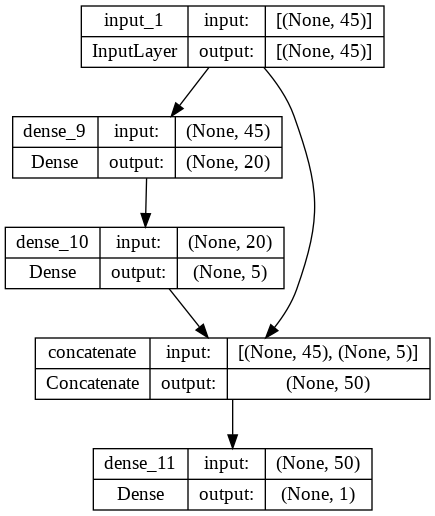

In [78]:
# Plot Layers
tf.keras.utils.plot_model(model_func, show_shapes=True)

In [80]:
# Train the Model
history_func = model_func.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), batch_size=15)

Epoch 1/10
338/338 [==============================] - 2s 4ms/step - loss: 0.5355 - accuracy: 0.7142 - val_loss: 0.4407 - val_accuracy: 0.7826
Epoch 2/10
338/338 [==============================] - 1s 4ms/step - loss: 0.4230 - accuracy: 0.8010 - val_loss: 0.4360 - val_accuracy: 0.7945
Epoch 3/10
338/338 [==============================] - 1s 3ms/step - loss: 0.4181 - accuracy: 0.8042 - val_loss: 0.4331 - val_accuracy: 0.7905
Epoch 4/10
338/338 [==============================] - 1s 4ms/step - loss: 0.4159 - accuracy: 0.8073 - val_loss: 0.4326 - val_accuracy: 0.7897
Epoch 5/10
338/338 [==============================] - 1s 3ms/step - loss: 0.4139 - accuracy: 0.8059 - val_loss: 0.4354 - val_accuracy: 0.7921
Epoch 6/10
338/338 [==============================] - 1s 3ms/step - loss: 0.4136 - accuracy: 0.8073 - val_loss: 0.4326 - val_accuracy: 0.7953
Epoch 7/10
338/338 [==============================] - 1s 3ms/step - loss: 0.4122 - accuracy: 0.8051 - val_loss: 0.4314 - val_accuracy: 0.7937
Epoch 

In [84]:
# Create DataFrame
history_func_df = pd.DataFrame(history_func.history)
history_func_df

,loss,accuracy,val_loss,val_accuracy
0,0.535455,0.714229,0.440687,0.782609
1,0.422957,0.800988,0.435998,0.794466
2,0.418139,0.804150,0.433137,0.790514
3,0.415864,0.807312,0.432576,0.789723
4,0.413945,0.805929,0.435382,0.792095
5,0.413563,0.807312,0.432574,0.795257
6,0.412236,0.805138,0.431384,0.793676
7,0.412247,0.807905,0.433796,0.793676
8,0.410753,0.809486,0.432113,0.792095
9,0.409643,0.809881,0.447569,0.776285


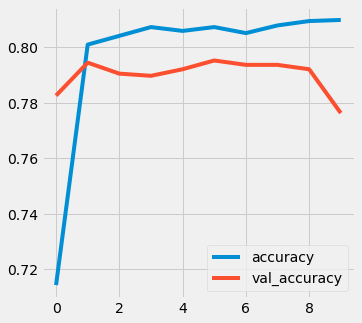

In [85]:
# Plot between accuracy and val_accuracy
history_func_df[['accuracy', 'val_accuracy']].plot()

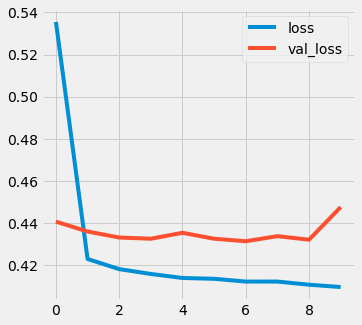

In [86]:
# Plot between loss and val_loss
history_func_df[['loss', 'val_loss']].plot()

In [81]:
# Model Evaluation
y_pred_func = model_func.predict(X_test)
y_pred_func = np.where(y_pred_func >=0.5, 1, 0)

print(classification_report(y_test, y_pred_func))

22/22 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.88      0.85      0.87       517
           1       0.62      0.67      0.65       186

    accuracy                           0.81       703
   macro avg       0.75      0.76      0.76       703
weighted avg       0.81      0.81      0.81       703



## **With Improvement**

In [90]:
# Pipeline
train_pipe_func = tf.data.Dataset.from_tensor_slices((X_train,y_train)).batch(10).repeat(5).shuffle(100).prefetch(tf.data.AUTOTUNE)
test_pipe_func = tf.data.Dataset.from_tensor_slices((X_test,y_test)).batch(10)
val_pipe_func = tf.data.Dataset.from_tensor_slices((X_val,y_val)).batch(10)

In [91]:
# Create Model
input_func_improved = Input(shape=(45,))
hidden1_func_improved = Dense(20, activation='relu')(input_func_improved)
hidden2_func_improved = Dense(5, activation='relu')(hidden1_func_improved)

concat_func_improved = concatenate([input_func_improved, hidden2_func_improved])
output_func_improved = Dense(1, activation='sigmoid')(concat_func_improved)

model_func_improved = Model(inputs=input_func_improved, outputs=output_func_improved)

# Compile
model_func_improved.compile(loss='binary_crossentropy',
                         optimizer='Adam',
                         metrics=['accuracy'])

model_func_improved.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 45)]         0           []                               
                                                                                                  
 dense_12 (Dense)               (None, 20)           920         ['input_2[0][0]']                
                                                                                                  
 dense_13 (Dense)               (None, 5)            105         ['dense_12[0][0]']               
                                                                                                  
 concatenate_1 (Concatenate)    (None, 50)           0           ['input_2[0][0]',                
                                                                  'dense_13[0][0]']         

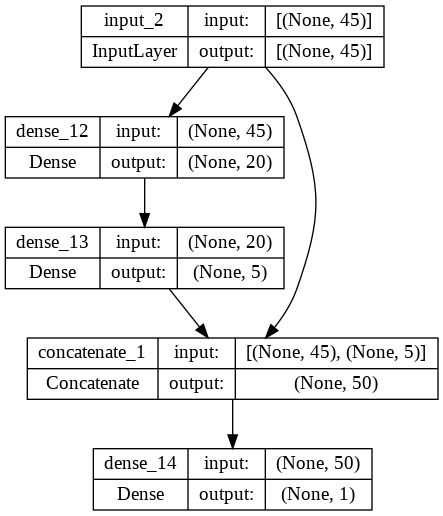

In [92]:
# Plot Layers
tf.keras.utils.plot_model(model_func_improved, show_shapes=True)

In [93]:
# Train the Model
history_func_improved = model_func_improved.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), batch_size=15)

Epoch 1/10
338/338 [==============================] - 2s 4ms/step - loss: 0.5521 - accuracy: 0.6982 - val_loss: 0.4434 - val_accuracy: 0.7779
Epoch 2/10
338/338 [==============================] - 1s 3ms/step - loss: 0.4251 - accuracy: 0.7994 - val_loss: 0.4417 - val_accuracy: 0.7747
Epoch 3/10
338/338 [==============================] - 1s 3ms/step - loss: 0.4198 - accuracy: 0.8020 - val_loss: 0.4353 - val_accuracy: 0.7953
Epoch 4/10
338/338 [==============================] - 1s 3ms/step - loss: 0.4164 - accuracy: 0.8051 - val_loss: 0.4352 - val_accuracy: 0.7937
Epoch 5/10
338/338 [==============================] - 1s 3ms/step - loss: 0.4153 - accuracy: 0.8059 - val_loss: 0.4367 - val_accuracy: 0.7945
Epoch 6/10
338/338 [==============================] - 1s 3ms/step - loss: 0.4150 - accuracy: 0.8067 - val_loss: 0.4328 - val_accuracy: 0.7913
Epoch 7/10
338/338 [==============================] - 1s 3ms/step - loss: 0.4140 - accuracy: 0.8069 - val_loss: 0.4329 - val_accuracy: 0.7937
Epoch 

In [94]:
# Create DataFrame
history_func_improved_df = pd.DataFrame(history_func.history)
history_func_improved_df

,loss,accuracy,val_loss,val_accuracy
0,0.535455,0.714229,0.440687,0.782609
1,0.422957,0.800988,0.435998,0.794466
2,0.418139,0.804150,0.433137,0.790514
3,0.415864,0.807312,0.432576,0.789723
4,0.413945,0.805929,0.435382,0.792095
5,0.413563,0.807312,0.432574,0.795257
6,0.412236,0.805138,0.431384,0.793676
7,0.412247,0.807905,0.433796,0.793676
8,0.410753,0.809486,0.432113,0.792095
9,0.409643,0.809881,0.447569,0.776285


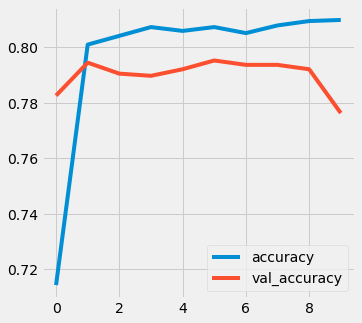

In [95]:
# Plot between accuracy and val_accuracy
history_func_improved_df[['accuracy', 'val_accuracy']].plot()

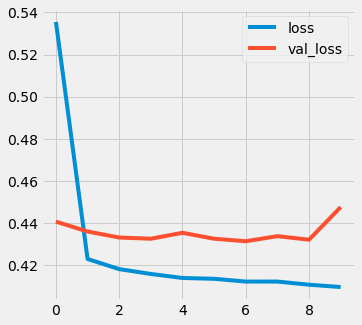

In [96]:
# Plot between loss and val_loss
history_func_improved_df[['loss', 'val_loss']].plot()

In [97]:
# Model Evaluation
y_pred_func_improved = model_func_improved.predict(X_test)
y_pred_func_improved = np.where(y_pred_func_improved >=0.5, 1, 0)

print(classification_report(y_test, y_pred_func_improved))

22/22 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       517
           1       0.71      0.52      0.60       186

    accuracy                           0.82       703
   macro avg       0.78      0.72      0.74       703
weighted avg       0.81      0.82      0.81       703



# **VIII. Conclusion**

Pada kasus ini, kondisi data adalah imbalance dengan jumlah pelanggan yang menghentikan langganannya jauh lebih sedikit. Proses pengolahan data yang dilakukan adalah data tidak dilakukan handling outlier dan feature selection. Tidak adanya metode resampling yang digunakan dapat menjadi salah satu indikasi penyebab munculnya hasil seperti ini. Model tidak dapat mempelajari lebih banyak mengenai data-data pelanggan yang memutuskan untuk menghentikan penggunaan layanan Telco. 

Berdasarkan percobaan yang dilakukan, Model yang cukup baik digunakan dalam kasus ini adalah Functional API tanpa adanya improvement. Walaupun nilai akurasi secara keseluruhan tidak jauh berbeda dengan Sequential API tanpa improvement, model berhasil mempelajari lebih banyak mengenai data-data pelanggan yang memutuskan untuk menghentikan penggunaan layanan Telco yang mana lebih mendekati pada tujuan uji coba ini yang dapat memprediksi perilaku berlangganan konsumen.